In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm


In [44]:
# constants with units in seconds
MIN_SSD = 2
MAX_SSD = 4.9
def sample_SSD(scale=1):
    SSD = np.random.exponential(scale=scale) + MIN_SSD
    while SSD > MAX_SSD:
        SSD = np.random.exponential(scale=scale) + MIN_SSD
    return SSD

In [45]:
MIN_SSD = 2
MAX_SSD = 4.9

def ai_ssd(scale=1):
    ai = np.random.exponential(scale=scale) + MIN_SSD
    SSD = np.random.exponential(scale=scale) + ai
    while SSD > MAX_SSD:
        ai = np.random.exponential(scale=scale) + MIN_SSD
        SSD = np.random.exponential(scale=scale) + ai
    
    return [ai, SSD]

In [50]:
ssds = [ai_ssd() for _ in range(1000000)]
ai = []
ssd = []
for i in range(0, len(ssds)):
    ai.append(ssds[i][0])
    ssd.append(ssds[i][1])

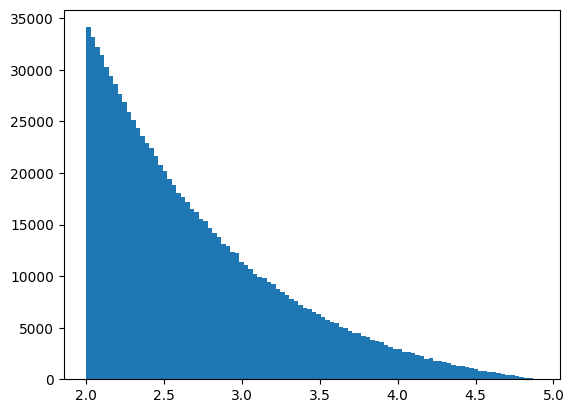

In [51]:
_ = plt.hist(ai, bins=100)

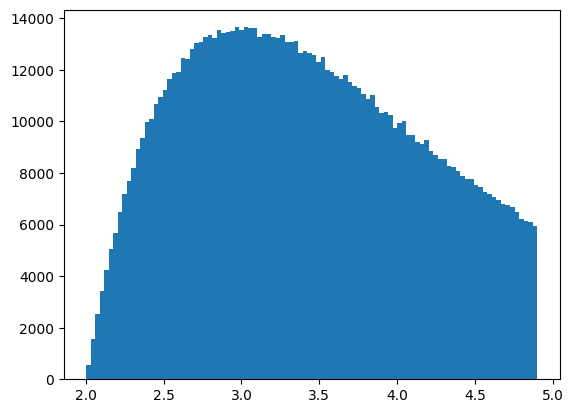

In [52]:
_ = plt.hist(ssd, bins=100)

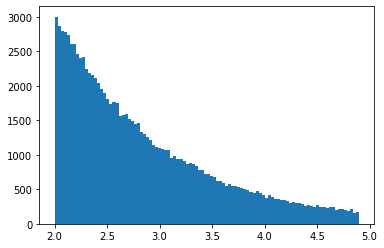

In [18]:
ssds = [sample_SSD() for _ in range(100000)]
_ = plt.hist(ssds, bins=100)

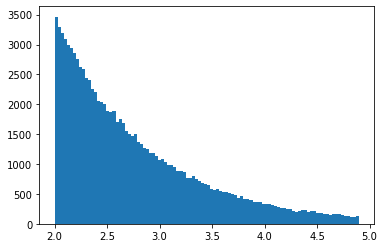

In [59]:
ssds = [sample_SSD(scale=.85) for _ in range(100000)]
_ = plt.hist(ssds, bins=100)

In [63]:
with open("data.txt", "w") as output:
    output.write(str(ssds))

 hazard function (i.e., the probability of the stop signal occurring at each moment in time, given it hasn't occurred yet)

In [19]:
df_og = pd.DataFrame(ssds, columns = ['durations'])
df_og['stop_trials'] = 1

In [64]:
df_og.to_csv(r'my_data.csv', index=False)

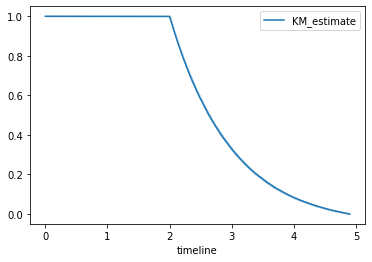

In [5]:
kmf = KaplanMeierFitter()
kmf.fit(durations = df_og['durations'], event_observed = df_og['stop_trials'])
kmf.plot_survival_function()

Text(0.5, 1.0, 'Survival function')

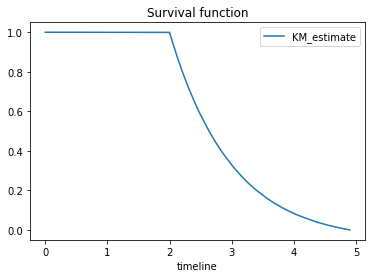

In [6]:
kmf.survival_function_.plot()
plt.title('Survival function')

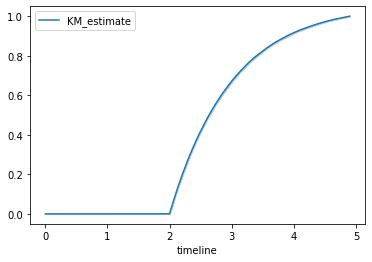

In [7]:
kmf.plot_cumulative_density()

In [8]:
pdf = norm.pdf(ssds)

In [9]:
pdf_df = pd.DataFrame(pdf)

In [10]:
hazard = pdf_df / kmf.survival_function_

In [52]:
naf = NelsonAalenFitter()
naf.fit(df_og['durations'], event_observed = df_og['stop_trials'])

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 100000 total observations, 0 right-censored observations>

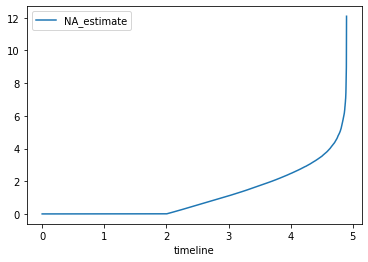

In [53]:
naf.cumulative_hazard_.plot()

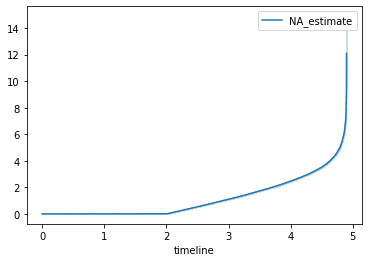

In [55]:
naf.plot(at_risk_counts=False)

In [ ]:
#inhibition_slope
rs = smf.glm('correct ~ SS_delay', data =  df.query('SS_trial_type == "stop"'), family = sm.families.Binomial()).fit()
dvs['inhibition_slope'] = {'value':  rs.params['SS_delay']  , 'valence': 'Pos'}
